# **Advanced Approaches to Combatting Disinformation:A Comprehensive Analysis for Fake News Detection**
## Team Members:
Rohan Dalvi: **332009706**   
Parshwa Paresh Bhavsar: **733000326**

## **Importing Necessary Libraries**

---
Here, I have imported all the necessary library so that Python script allows me to clearly see and manage the dependencies of code it relies on.




In [60]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['backend'] = "Agg"
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Reading datasets

In [61]:
fake_data = pd.read_csv("/content/Fake.csv")
true_data = pd.read_csv("/content/True.csv")

In [62]:
fake_data.shape

(23481, 4)

In [63]:
true_data.shape

(21417, 4)

## Data cleaning and preparation

In [64]:
fake_data['target'] = 'fake'
true_data['target'] = 'true'

## Concatenate dataframes

In [65]:
merged_data = pd.concat([fake_data, true_data]).reset_index(drop=True)
merged_data.shape

(44898, 5)

## Shuffling the Data

In [66]:
from sklearn.utils import shuffle
shuffled_data = shuffle(merged_data).reset_index(drop=True)

## Checking the Data

In [67]:
shuffled_data.head()

,title,text,subject,date,target
0,"Once on the outside, conservative Koch network...","COLORADO SPRINGS, Colo. (Reuters) - At a glitz...",politicsNews,"June 27, 2017",true
1,At least six killed in Iran by quake: TV,ANKARA (Reuters) - At least six people were ki...,worldnews,"November 12, 2017",true
2,PELOSI LOSES IT: Calls Tax Cuts ‘End of the Wo...,Nancy Pelosi just got even more embarrassing t...,politics,"Dec 4, 2017",fake
3,Italy seizes 100 tonnes of diesel on ship sail...,ROME (Reuters) - Italian police said on Saturd...,worldnews,"November 4, 2017",true
4,Trump summit with Mexico's Pena Nieto still on...,"MEXICO CITY, (Reuters) - A summit between U.S....",politicsNews,"January 26, 2017",true


## Removing the Date & Title for better analysis

In [68]:
shuffled_data.drop(["date", "title"], axis=1, inplace=True)
shuffled_data.head()

,text,subject,target
0,"COLORADO SPRINGS, Colo. (Reuters) - At a glitz...",politicsNews,true
1,ANKARA (Reuters) - At least six people were ki...,worldnews,true
2,Nancy Pelosi just got even more embarrassing t...,politics,fake
3,ROME (Reuters) - Italian police said on Saturd...,worldnews,true
4,"MEXICO CITY, (Reuters) - A summit between U.S....",politicsNews,true


## Converting to Lowercase

In [69]:
shuffled_data['text'] = shuffled_data['text'].apply(lambda x: x.lower())
shuffled_data.head()

,text,subject,target
0,"colorado springs, colo. (reuters) - at a glitz...",politicsNews,true
1,ankara (reuters) - at least six people were ki...,worldnews,true
2,nancy pelosi just got even more embarrassing t...,politics,fake
3,rome (reuters) - italian police said on saturd...,worldnews,true
4,"mexico city, (reuters) - a summit between u.s....",politicsNews,true


## **Removing Punctuation**

---

This code defines a function `remove_punctuation` that takes a text input and removes all punctuation characters from it using a list comprehension. Then, it applies this function to the 'text' column of a DataFrame called `shuffled_data`, removing punctuation from each text entry in that column.


In [70]:
import string
def remove_punctuation(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
shuffled_data['text'] = shuffled_data['text'].apply(remove_punctuation)
shuffled_data.head()

,text,subject,target
0,colorado springs colo reuters at a glitzy wee...,politicsNews,true
1,ankara reuters at least six people were kille...,worldnews,true
2,nancy pelosi just got even more embarrassing t...,politics,fake
3,rome reuters italian police said on saturday ...,worldnews,true
4,mexico city reuters a summit between us presi...,politicsNews,true


## **Removing Stopwords**

---
This code uses the Natural Language Toolkit (NLTK) library to download English stopwords. It then applies a lambda function to the 'text' column of a DataFrame (`shuffled_data`), removing stopwords from each text entry by splitting the text into words and joining back only those words that are not in the set of stopwords.


In [71]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

shuffled_data['text'] = shuffled_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
shuffled_data.head()

,text,subject,target
0,colorado springs colo reuters glitzy weekend g...,politicsNews,true
1,ankara reuters least six people killed iranian...,worldnews,true
2,nancy pelosi got even embarrassing ever pulled...,politics,fake
3,rome reuters italian police said saturday seiz...,worldnews,true
4,mexico city reuters summit us president donald...,politicsNews,true


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


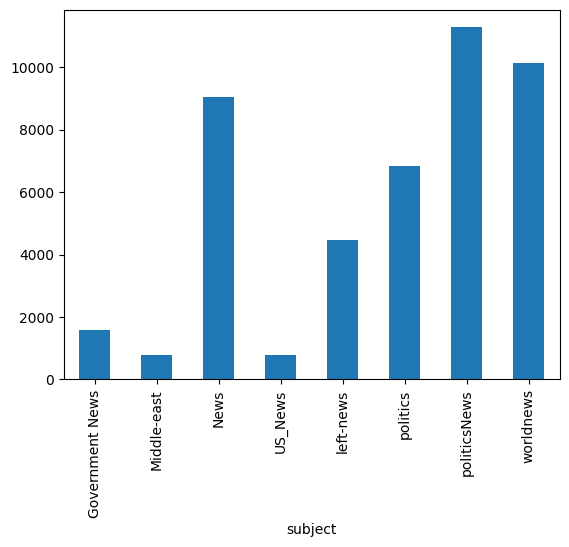

In [73]:
print(shuffled_data.groupby(['subject'])['text'].count())
shuffled_data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


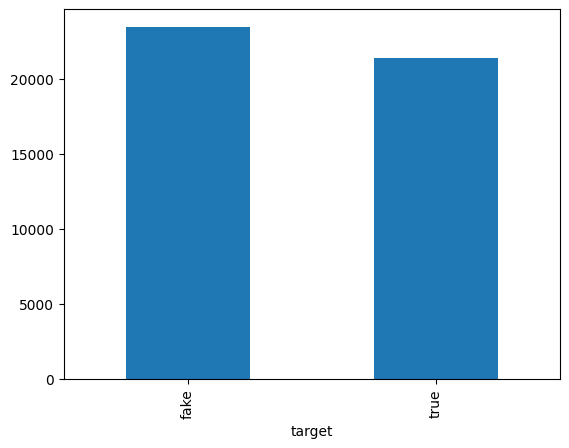

In [74]:
print(shuffled_data.groupby(['target'])['text'].count())
shuffled_data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

# **Word Cloud for Fake News Text**
---

This code generates a word cloud for fake news by first concatenating all the text entries from the 'text' column where the 'target' column is labeled as 'fake'. It then uses the WordCloud library to create a visual representation of the most frequent words in the fake news text. The resulting word cloud is displayed using matplotlib with a specified width, height, and title. The 'plt.axis('off')' line removes axis labels for a cleaner visualization.

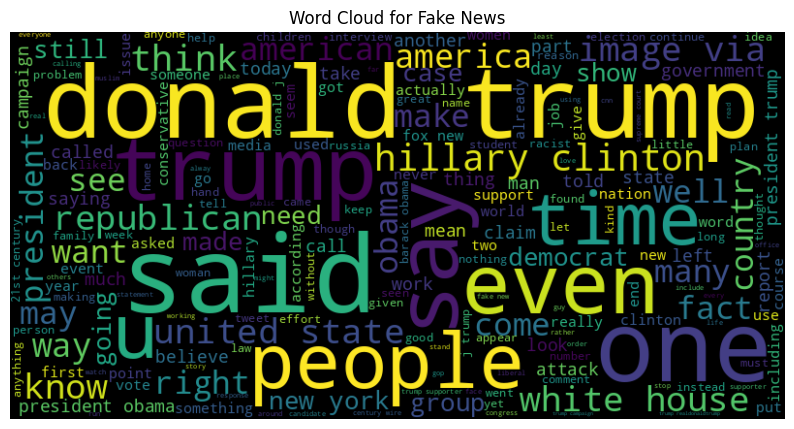

In [75]:
# Word cloud for fake news
from wordcloud import WordCloud
fake_text = ' '.join(shuffled_data[shuffled_data['target'] == 'fake']['text'])
wordcloud_fake = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()




# **Word Cloud for True News Text**

---
This code generates a word cloud for true news by concatenating all the text entries from the 'text' column where the 'target' column is labeled as 'true'. Similar to the previous example, it uses the WordCloud library to create a visual representation of the most frequent words in the true news text. The resulting word cloud is displayed using matplotlib with a specified width, height, and title. The 'plt.axis('off')' line removes axis labels for a cleaner visualization.


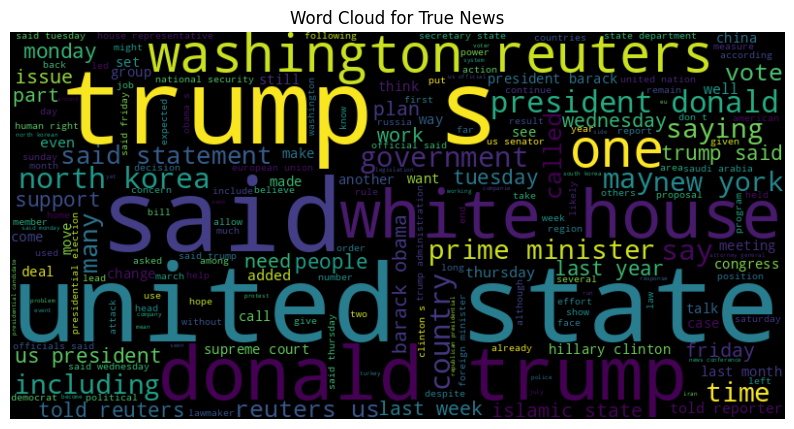

In [76]:
true_text = ' '.join(shuffled_data[shuffled_data['target'] == 'true']['text'])
wordcloud_true = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(true_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for True News')
plt.show()

## **Most frequent words counter**

---
This code defines a function named `counter` that takes a DataFrame (`shuffled_data`), a column name (`column_text`), and a quantity parameter. It then tokenizes the text in the specified column, calculates the frequency distribution of words, and creates a bar plot displaying the top 'quantity' most frequent words. The resulting plot is created using seaborn and matplotlib, with the x-axis representing words, the y-axis representing word frequencies, and the bars colored in blue. The `plt.xticks(rotation='vertical')` line rotates the x-axis labels for better visibility.


In [77]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(shuffled_data, column_text, quantity):
    all_words = ' '.join(shuffled_data[column_text])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                 "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", color='blue')
    ax.set(ylabel="Count")
    plt.xticks(rotation='vertical')
    plt.show()

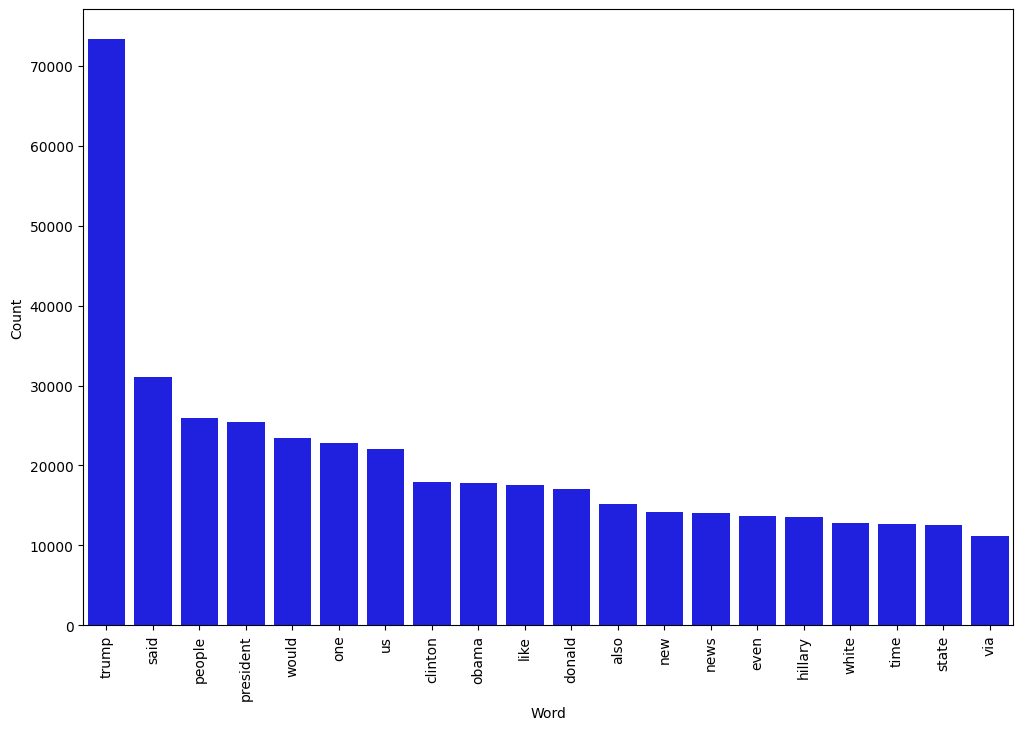

In [78]:
# Most frequent words in fake news
counter(shuffled_data[shuffled_data["target"] == "fake"], "text", 20)

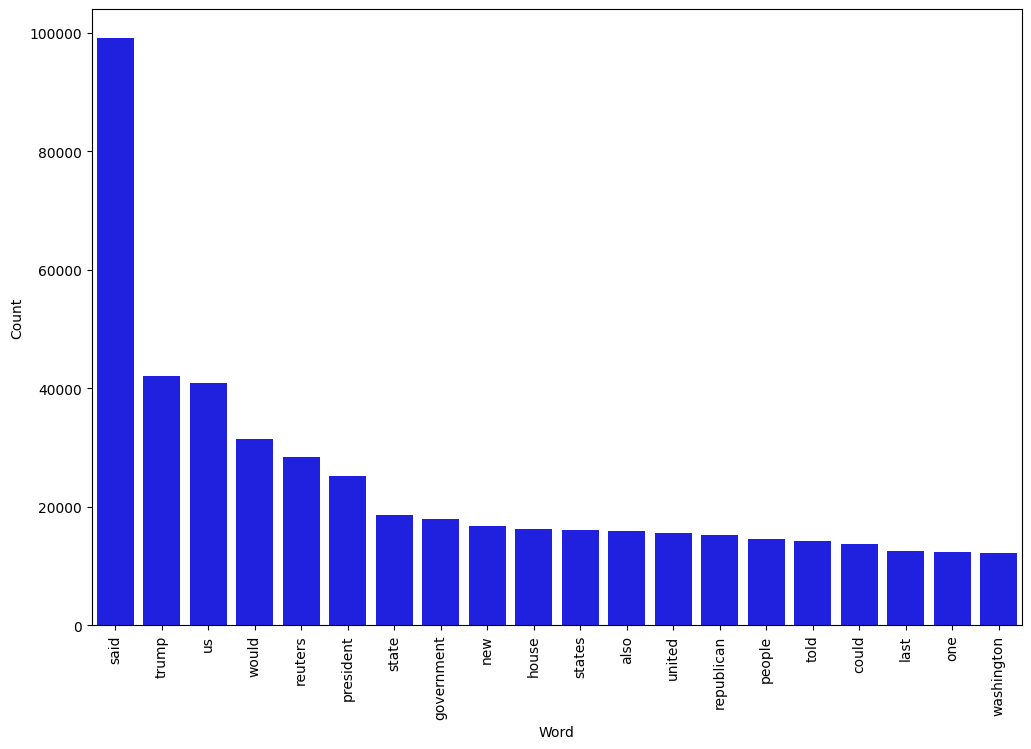

In [79]:
# Most frequent words in real news
counter(shuffled_data[shuffled_data["target"] == "true"], "text", 20)

## **Modeling**

---
This code defines a function named plot_confusion_matrix that takes a confusion matrix (cm), a list of class names (classes), and optional parameters for normalization, title, and colormap. It uses matplotlib and itertools to visualize the confusion matrix, with options to normalize the values, set a title, and choose a color map.




In [80]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Splitting the Data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_data['text'], shuffled_data.target, test_size=0.2, random_state=42)

# **Naive Bayes**

---

This code sets up a pipeline for a Naive Bayes classifier using the Multinomial Naive Bayes (MultinomialNB) from scikit-learn. It includes a Count Vectorizer, a Term Frequency-Inverse Document Frequency (TF-IDF) Transformer, and the Multinomial Naive Bayes classifier. The pipeline is then trained on the training data (X_train, y_train), and predictions are made on the test data (X_test). The accuracy of the Naive Bayes model is then calculated and printed.



In [82]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
NB_classifier = MultinomialNB()
pipe_nb = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])
model_nb = pipe_nb.fit(X_train, y_train)
prediction_nb = model_nb.predict(X_test)
print("Naive Bayes accuracy: {}%".format(round(accuracy_score(y_test, prediction_nb) * 100, 2)))



Naive Bayes accuracy: 94.81%


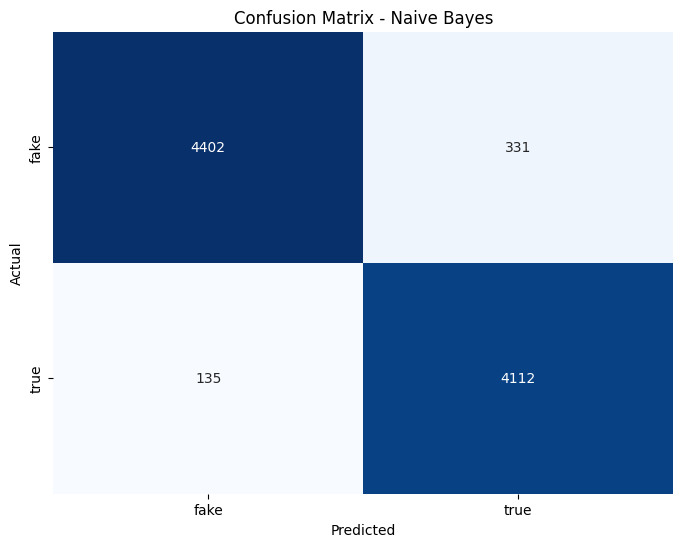

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Logistic regression**

---

This code sets up a pipeline for a Logistic Regression classifier using scikit-learn. The pipeline consists of a Count Vectorizer, a Term Frequency-Inverse Document Frequency (TF-IDF) Transformer, and the Logistic Regression classifier. The pipeline is trained on the training data (X_train, y_train), and predictions are made on the test data (X_test). The accuracy of the Logistic Regression model is then calculated and printed.



In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [102]:
pipe_lr = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
model_lr = pipe_lr.fit(X_train, y_train)
prediction_lr = model_lr.predict(X_test)
print("Logistic Regression accuracy: {}%".format(round(accuracy_score(y_test, prediction_lr) * 100, 2)))


Logistic Regression accuracy: 98.83%


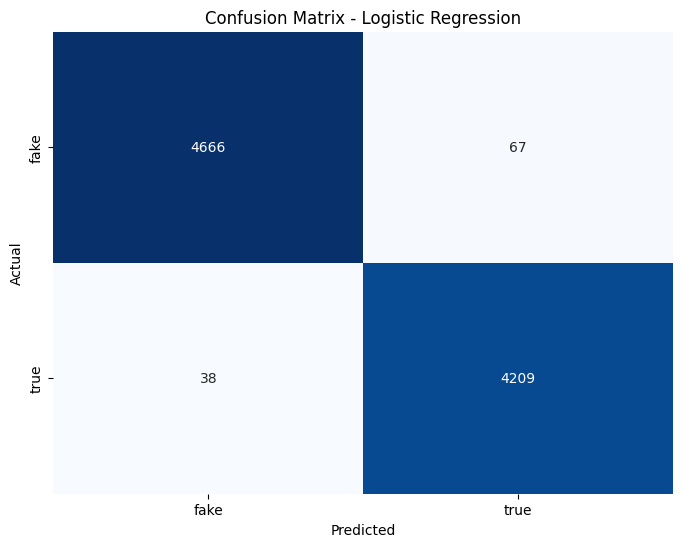

In [103]:
cm_lr = confusion_matrix(y_test, prediction_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Decision Tree**

---

This code sets up a pipeline for a Decision Tree classifier using scikit-learn. The pipeline includes a Count Vectorizer, a Term Frequency-Inverse Document Frequency (TF-IDF) Transformer, and the Decision Tree classifier. The Decision Tree classifier is configured with specific parameters such as the criterion ('entropy'), maximum depth (20), splitting strategy ('best'), and a random seed for reproducibility (random_state=42). The pipeline is then trained on the training data (X_train, y_train), and predictions are made on the test data (X_test). The accuracy of the Decision Tree model is calculated and printed.



In [88]:
from sklearn.tree import DecisionTreeClassifier
pipe_dt = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion='entropy',
                                                  max_depth=20,
                                                  splitter='best',
                                                  random_state=42))])
model_dt = pipe_dt.fit(X_train, y_train)
prediction_dt = model_dt.predict(X_test)
print("Decision Tree accuracy: {}%".format(round(accuracy_score(y_test, prediction_dt) * 100, 2)))



Decision Tree accuracy: 99.65%


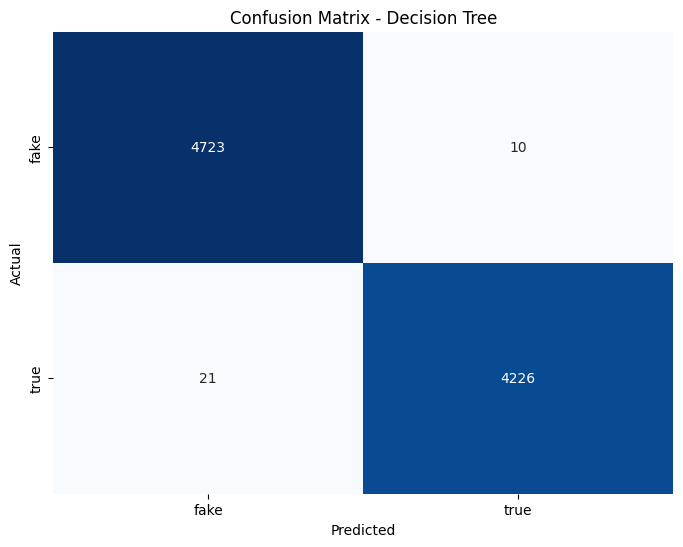

In [108]:
cm_dt = confusion_matrix(y_test, prediction_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_dt.named_steps['model'].classes_,
            yticklabels=model_dt.named_steps['model'].classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Random Forest**

---
This code sets up a pipeline for a Random Forest classifier using scikit-learn. The pipeline consists of a Count Vectorizer, a Term Frequency-Inverse Document Frequency (TF-IDF) Transformer, and the Random Forest classifier. The Random Forest classifier is configured with specific parameters, including the number of estimators (trees) set to 50 and the criterion for splitting nodes set to 'entropy'. The pipeline is then trained on the training data (X_train, y_train), and predictions are made on the test data (X_test). The accuracy of the Random Forest model is calculated and printed.




In [90]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model_rf = pipe_rf.fit(X_train, y_train)
prediction_rf = model_rf.predict(X_test)
print("Random Forest accuracy: {}%".format(round(accuracy_score(y_test, prediction_rf) * 100, 2)))


Random Forest accuracy: 99.12%


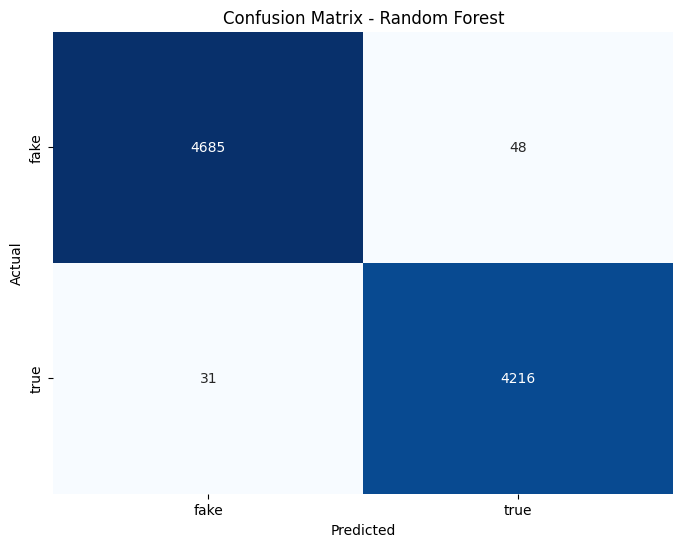

In [109]:
cm_rf = confusion_matrix(y_test, prediction_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_rf.named_steps['model'].classes_,
            yticklabels=model_rf.named_steps['model'].classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Support Vector Machine (SVM)**

---

This code sets up a pipeline for a Support Vector Machine (SVM) classifier using scikit-learn. The pipeline includes a Count Vectorizer, a Term Frequency-Inverse Document Frequency (TF-IDF) Transformer, and the SVM classifier with a linear kernel. The pipeline is then trained on the training data (X_train, y_train), and predictions are made on the test data (X_test). The accuracy of the SVM model is calculated and printed.



In [91]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear')
pipe_svm = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', svm_classifier)])
model_svm = pipe_svm.fit(X_train, y_train)
prediction_svm = model_svm.predict(X_test)
print("SVM accuracy: {}%".format(round(accuracy_score(y_test, prediction_svm) * 100, 2)))


SVM accuracy: 99.57%


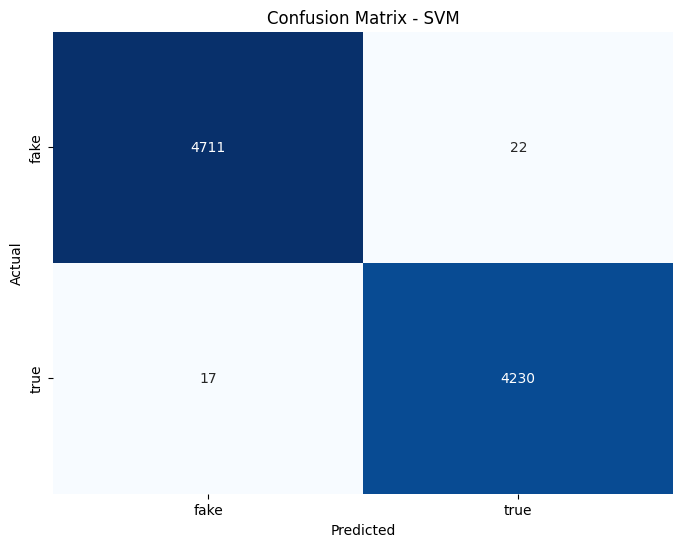

In [110]:
cm_svm = confusion_matrix(y_test, prediction_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_svm.named_steps['model'].classes_,
            yticklabels=model_svm.named_steps['model'].classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Comparing** **Different Models**

---
This code creates a bar plot to compare the accuracy of different classifiers. It uses a dictionary (accuracy_dict) to store the accuracy scores for each classifier and then plots the accuracies using matplotlib's bar plot. The y-axis limits are set between 90 and 100, and specific y-axis ticks are specified.




([<matplotlib.axis.YTick at 0x7963cd11ada0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

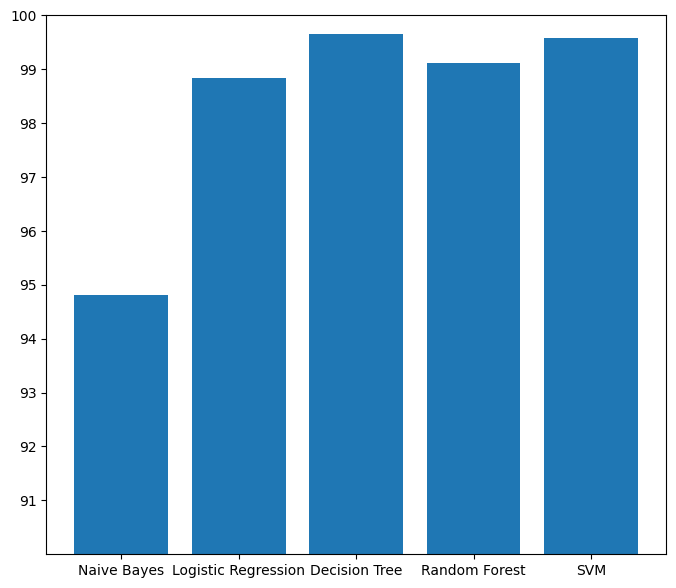

In [92]:
accuracy_dict = {'Naive Bayes': round(accuracy_score(y_test, prediction_nb) * 100, 2),
                 'Logistic Regression': round(accuracy_score(y_test, prediction_lr) * 100, 2),
                 'Decision Tree': round(accuracy_score(y_test, prediction_dt) * 100, 2),
                 'Random Forest': round(accuracy_score(y_test, prediction_rf) * 100, 2),
                 'SVM': round(accuracy_score(y_test, prediction_svm) * 100, 2)}

plt.figure(figsize=(8, 7))
plt.bar(list(accuracy_dict.keys()), list(accuracy_dict.values()))
plt.ylim(90, 100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
